*Student Full Name: Derly Milded Montealegre Gonzalez 
*Student Number: 2024151 
*Module Title: Strategic Thinking
*Assessment Title: CA 2 Capstone Report
*Assessment Due Date: 16 April 2024 
*Date of Submission: 19 May 2024

# Discovery

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

## Reading the Data

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type.

In [2]:
data = pd.read_csv('housing.csv', encoding="latin1")
data = data.sample(frac=0.2)

C:\Users\monte\AppData\Local\Temp\ipykernel_31252\1655641777.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('housing.csv', encoding="latin1")


In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
127110,https://bj.lianjia.com/chengjiao/BJCY84602000....,BJCY84602000,116.586465,39.918172,1111027375141,2012-06-09,NaN,0,79.0,21491,...,4.0,2005,1,6,0.400,1.0,1.0,1.0,7,55507.0
164911,https://bj.lianjia.com/chengjiao/BJCY89086412....,BJCY89086412,116.511520,39.901436,1111027381719,2015-08-27,NaN,27,427.0,29695,...,3.0,2008,3,6,1.000,1.0,1.0,0.0,7,62702.0
207753,https://bj.lianjia.com/chengjiao/BJDX60217745....,BJDX60217745,116.439326,39.821816,1111027376790,2011-11-09,NaN,0,148.0,16788,...,4.0,2007,1,6,0.500,0.0,0.0,0.0,4,46692.0
68582,https://bj.lianjia.com/chengjiao/101101280467....,101101280467,116.377850,39.842419,1111027374041,2017-03-06,2.0,0,175.0,50288,...,1.0,2010,1,6,0.138,1.0,0.0,1.0,2,38915.0
300894,https://bj.lianjia.com/chengjiao/BJXC85906738....,BJXC85906738,116.390549,39.957292,1111027375583,2013-09-03,NaN,4,491.0,65284,...,4.0,2003,1,4,0.333,0.0,0.0,1.0,10,128939.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 127110 to 61973
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  object 
 6   DOM                  32001 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null 

In [5]:
data.shape

(63770, 26)

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,63770.000000,63770.000000,6.377000e+04,32001.000000,63770.000000,63770.000000,63770.000000,63770.000000,63770.000000,63380.000000,63770.000000,63770.000000,63770.000000,63764.000000,63764.000000,63764.000000,63770.000000,63680.000000
mean,116.418842,39.950265,1.144939e+12,29.049592,16.781857,348.059997,43469.536051,83.157090,0.994245,3.006915,2.605300,4.459401,0.380289,0.578430,0.643717,0.601060,6.776901,63673.895289
std,0.112141,0.091939,4.621670e+12,51.325281,34.735797,227.311875,21681.022968,37.046634,0.108658,1.269989,1.311946,1.899205,0.178175,0.493814,0.478904,0.489684,2.815883,22334.046225
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,8.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.345582,39.893778,1.111027e+12,1.000000,0.000000,204.000000,27976.250000,57.870000,1.000000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46307.250000
50%,116.416888,39.934643,1.111027e+12,7.000000,5.000000,293.000000,38740.000000,74.200000,1.000000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477730,40.003028,1.111027e+12,37.000000,18.000000,425.000000,53818.000000,98.700000,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,75993.000000
max,116.732378,40.252758,1.114620e+15,1401.000000,1143.000000,4800.000000,150000.000000,574.240000,4.000000,4.000000,4.000000,6.000000,3.333000,1.000000,1.000000,1.000000,13.000000,183109.000000


# Data Preparation

Convert object columns to numeric:

In [7]:
extr = data["tradeTime"].str.extract(r"^(\d{4})", expand=False)

In [8]:
extr.head(10)

127110    2012
164911    2015
207753    2011
68582     2017
300894    2013
187352    2016
102006    2013
122314    2011
167579    2015
245941    2013
Name: tradeTime, dtype: object

In [9]:
data['tradeTime'] = pd.to_numeric(extr, errors='coerce')

In [10]:
extr = data["constructionTime"].str.extract(r"^(\d{4})", expand=False)

In [11]:
extr.head(10)

127110    2005
164911    2008
207753    2007
68582     2010
300894    2003
187352    1984
102006    2004
122314    2000
167579    2004
245941    2011
Name: constructionTime, dtype: object

In [12]:
data['constructionTime'] = pd.to_numeric(extr, errors='coerce')

In [13]:
data['livingRoom'] = pd.to_numeric(data['livingRoom'], errors='coerce')

In [14]:
data['drawingRoom'] = pd.to_numeric(data['drawingRoom'], errors='coerce')

In [15]:
data['bathRoom'] = pd.to_numeric(data['bathRoom'], errors='coerce')

In [16]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
127110,https://bj.lianjia.com/chengjiao/BJCY84602000....,BJCY84602000,116.586465,39.918172,1111027375141,2012,NaN,0,79.0,21491,...,4.0,2005.0,1,6,0.400,1.0,1.0,1.0,7,55507.0
164911,https://bj.lianjia.com/chengjiao/BJCY89086412....,BJCY89086412,116.511520,39.901436,1111027381719,2015,NaN,27,427.0,29695,...,3.0,2008.0,3,6,1.000,1.0,1.0,0.0,7,62702.0
207753,https://bj.lianjia.com/chengjiao/BJDX60217745....,BJDX60217745,116.439326,39.821816,1111027376790,2011,NaN,0,148.0,16788,...,4.0,2007.0,1,6,0.500,0.0,0.0,0.0,4,46692.0
68582,https://bj.lianjia.com/chengjiao/101101280467....,101101280467,116.377850,39.842419,1111027374041,2017,2.0,0,175.0,50288,...,1.0,2010.0,1,6,0.138,1.0,0.0,1.0,2,38915.0
300894,https://bj.lianjia.com/chengjiao/BJXC85906738....,BJXC85906738,116.390549,39.957292,1111027375583,2013,NaN,4,491.0,65284,...,4.0,2003.0,1,4,0.333,0.0,0.0,1.0,10,128939.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 127110 to 61973
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  int64  
 6   DOM                  32001 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63764 non-null  float64
 12  drawingRoom          63764 non-null  float64
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63769 non-null  float64
 15  floor                63770 non-null 

## Preprocesing the data

Since these variables do not seem to influence my target variable, they are removed to simplify the analysis, since I consider that it does not contain relevant information.

In [18]:
data.drop('url', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('floor', axis=1, inplace=True)

Dropping rows with missed prices (target variable)

In [19]:
data.dropna(subset=['price'], inplace=True)

In [20]:
missing_value_formats = ["?","NA","Na","NaN.",".NaN","NaN","nA","na","n.a","n.a.","Î´Öª",".n.a","n/a","nan","--","UnKnown"]
data.replace(missing_value_formats, float("NaN"), inplace=True)

These missing values are placed so that they can later be recognized as missing values and treated appropriately in the resulting DataFrame.

## Calculate the number of missing values per variable

In [21]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

## Missing values graph

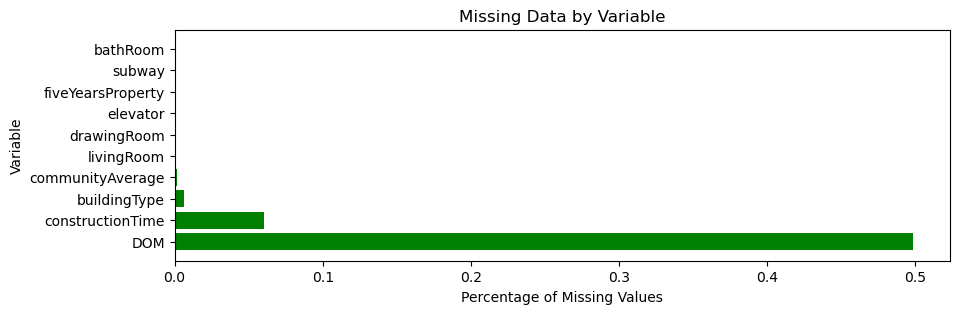

In [22]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the DOM,buildingType,communityAverage and constructionTime columns,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [23]:
data[['DOM','constructionTime','buildingType', 'communityAverage']].describe() 

,DOM,constructionTime,buildingType,communityAverage
count,32001.000000,59928.000000,63380.000000,63680.000000
mean,29.049592,1999.187825,3.006915,63673.895289
std,51.325281,8.781398,1.269989,22334.046225
min,1.000000,1934.000000,0.250000,10847.000000
25%,1.000000,1994.000000,1.000000,46307.250000
50%,7.000000,2001.000000,4.000000,59015.000000
75%,37.000000,2006.000000,4.000000,75993.000000
max,1401.000000,2016.000000,4.000000,183109.000000


Depending on the nature of the data and the context of the problem, an imputation method is chosen for each column

In [24]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)
data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)
data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

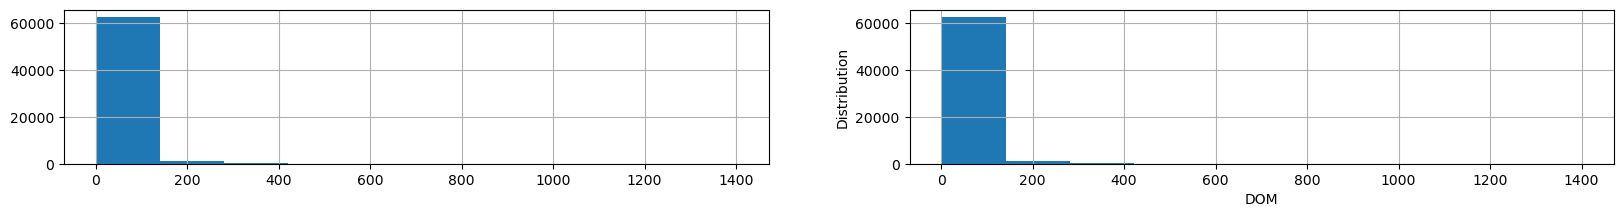

In [25]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['DOM'].hist(ax=ax1)
plt.xlabel('DOM')
plt.ylabel('Distribution')

data['DOM'].fillna(data['DOM'].mean(), inplace=True)

data['DOM'].hist(ax=ax2)

plt.show()

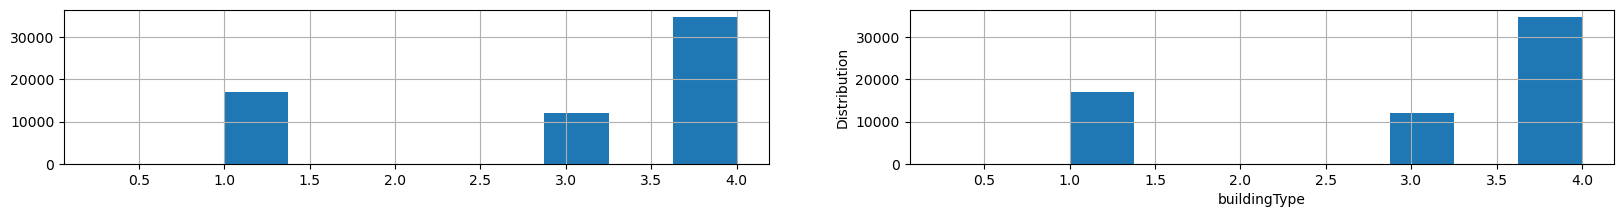

In [26]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['buildingType'].hist(ax=ax1)
plt.xlabel('buildingType')
plt.ylabel('Distribution')

data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)

data['buildingType'].hist(ax=ax2)

plt.show()

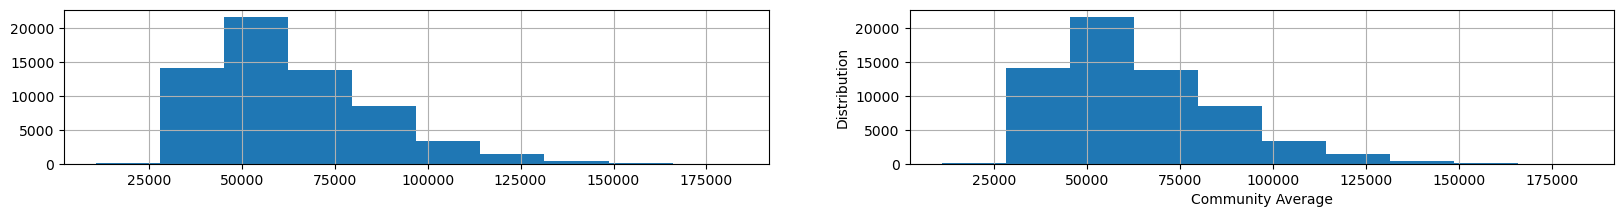

In [27]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()

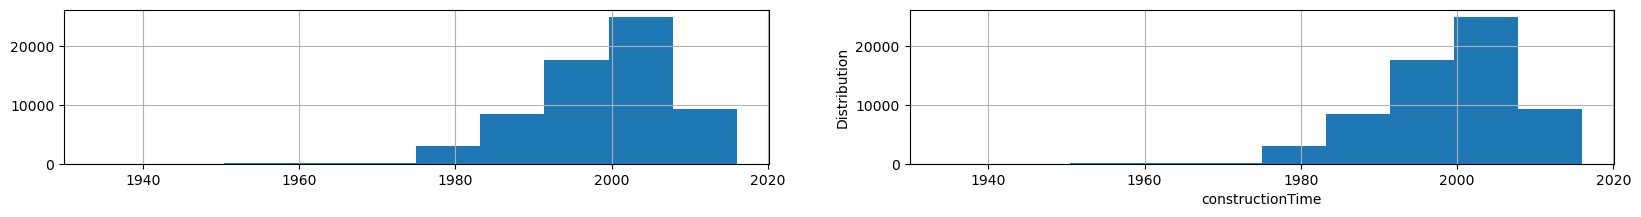

In [28]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['constructionTime'].hist(ax=ax1)
plt.xlabel('constructionTime')
plt.ylabel('Distribution')

data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

data['constructionTime'].hist(ax=ax2)

plt.show()

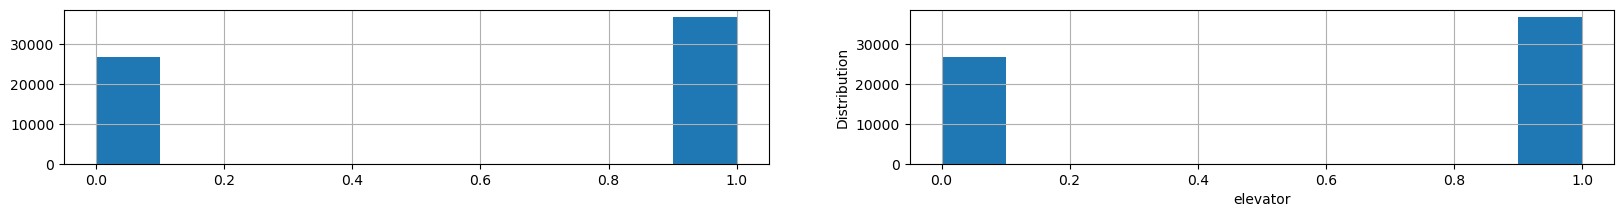

In [29]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['elevator'].hist(ax=ax1)
plt.xlabel('elevator')
plt.ylabel('Distribution')

data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)

data['elevator'].hist(ax=ax2)

plt.show()

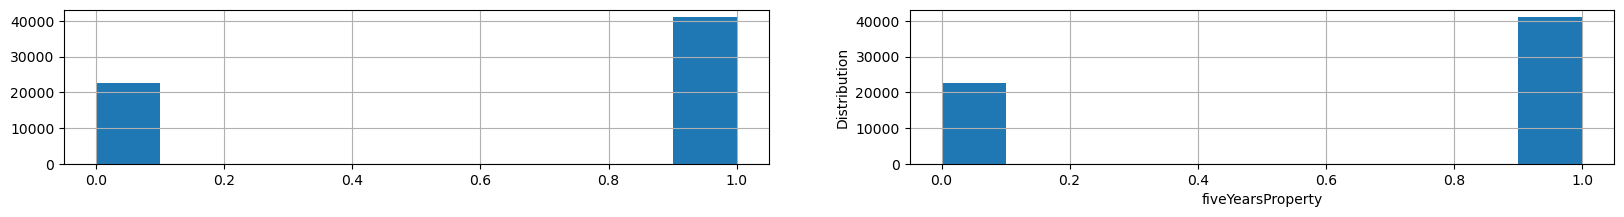

In [30]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['fiveYearsProperty'].hist(ax=ax1)
plt.xlabel('fiveYearsProperty')
plt.ylabel('Distribution')

data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)

data['fiveYearsProperty'].hist(ax=ax2)

plt.show()

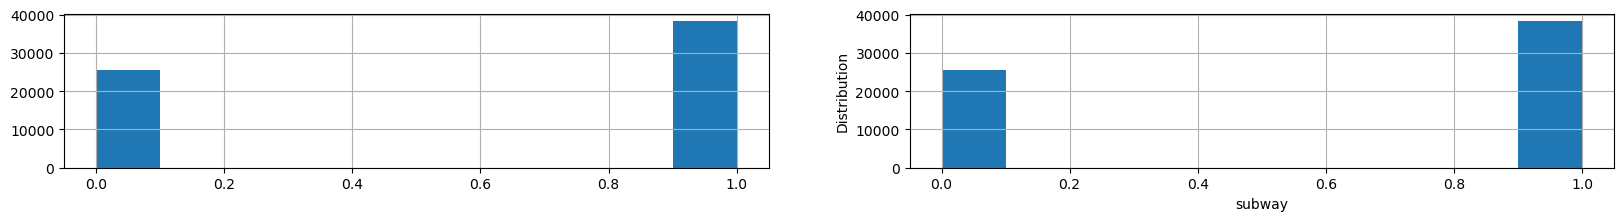

In [31]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['subway'].hist(ax=ax1)
plt.xlabel('subway')
plt.ylabel('Distribution')

data['subway'].fillna(data['subway'].mode()[0], inplace=True)

data['subway'].hist(ax=ax2)

plt.show()

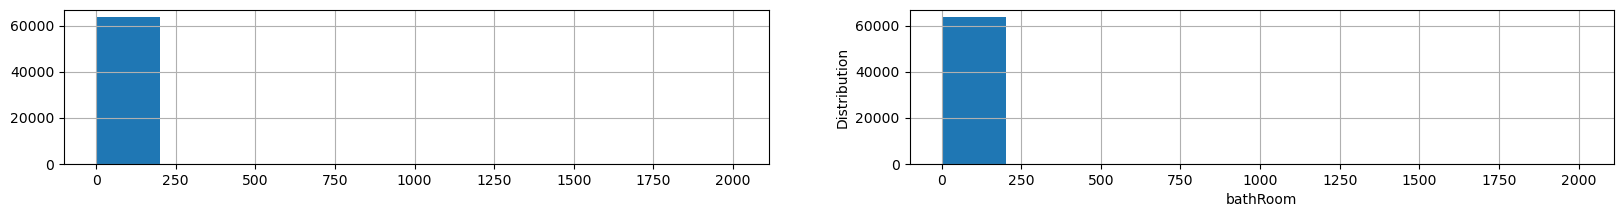

In [32]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['bathRoom'].hist(ax=ax1)
plt.xlabel('bathRoom')
plt.ylabel('Distribution')

data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

data['bathRoom'].hist(ax=ax2)

plt.show()

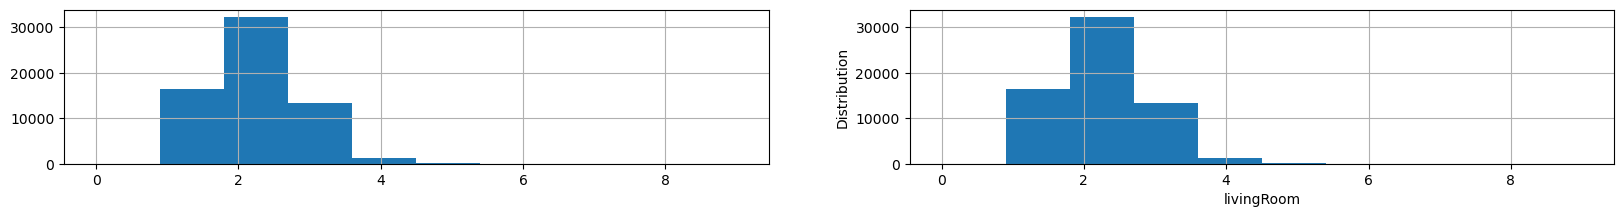

In [33]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['livingRoom'].hist(ax=ax1)
plt.xlabel('livingRoom')
plt.ylabel('Distribution')

data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)

data['livingRoom'].hist(ax=ax2)

plt.show()

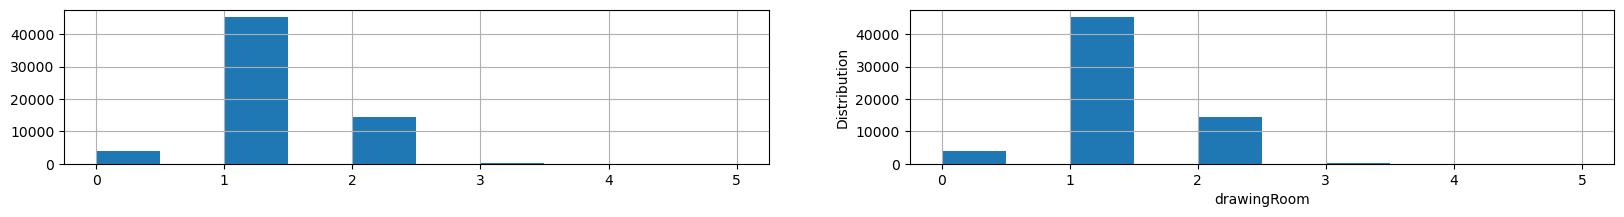

In [34]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['drawingRoom'].hist(ax=ax1)
plt.xlabel('drawingRoom')
plt.ylabel('Distribution')

data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

data['drawingRoom'].hist(ax=ax2)

plt.show()

It can be observed that the graphs do not show significant changes from one to the other, so we can conclude that the imputation of missing values does not alter the distributions of the variables.

Identifying which columns have missing values:

In [35]:
data.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 127110 to 61973
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  63770 non-null  float64
 1   Lat                  63770 non-null  float64
 2   Cid                  63770 non-null  int64  
 3   tradeTime            63770 non-null  int64  
 4   DOM                  63770 non-null  float64
 5   followers            63770 non-null  int64  
 6   totalPrice           63770 non-null  float64
 7   price                63770 non-null  int64  
 8   square               63770 non-null  float64
 9   livingRoom           63770 non-null  float64
 10  drawingRoom          63770 non-null  float64
 11  kitchen              63770 non-null  int64  
 12  bathRoom             63770 non-null  float64
 13  buildingType         63770 non-null  float64
 14  constructionTime     63770 non-null  float64
 15  renovationCondition  63770 non-null 

## Data standardization

In [37]:
from sklearn import preprocessing

X = data.drop('price', axis=1)
y = data['price']

X_scaled = preprocessing.scale(X)

C:\Users\monte\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [38]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

## Visualising Data

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=1, errors='ignore')
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=0, errors='ignore')

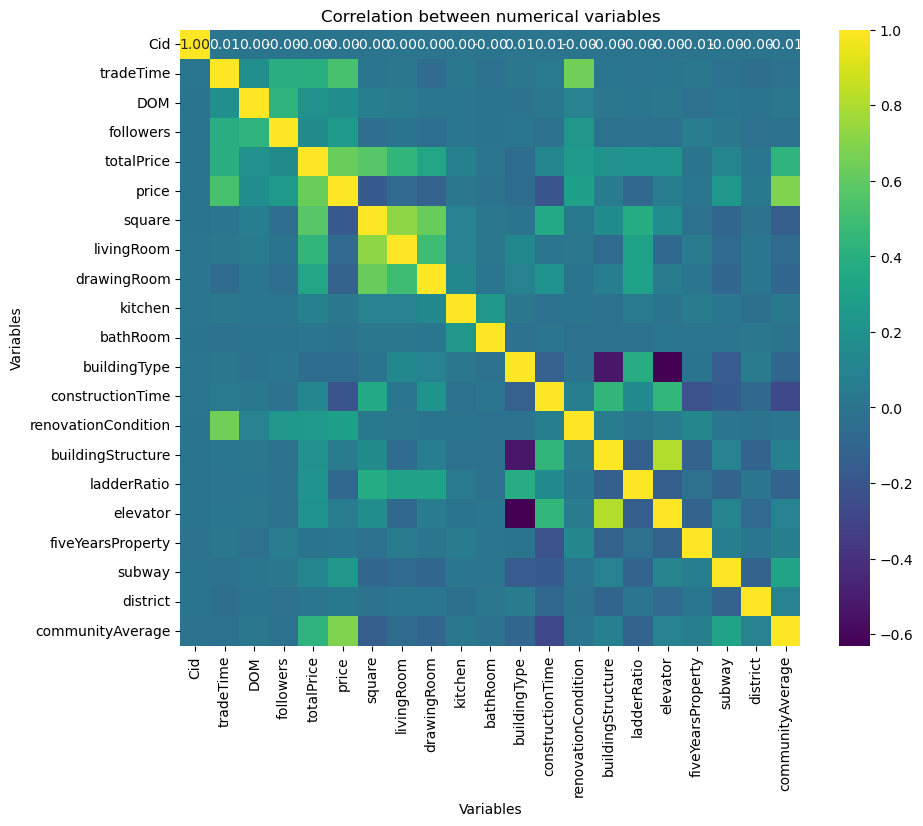

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation between numerical variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


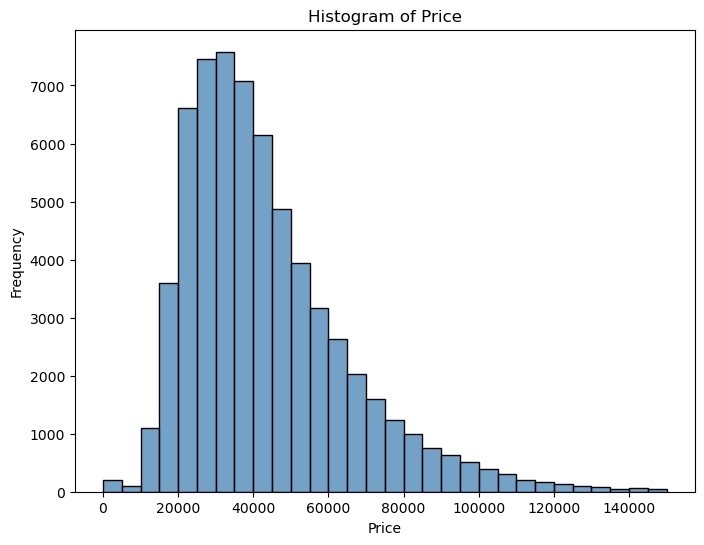

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', color='steelblue', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
quantiles_teoricos = np.random.normal(loc=0, scale=1, size=len(data['price']))
price_sorted = np.sort(data['price'])
quantiles = stats.norm.ppf(np.linspace(0, 1, len(price_sorted)))

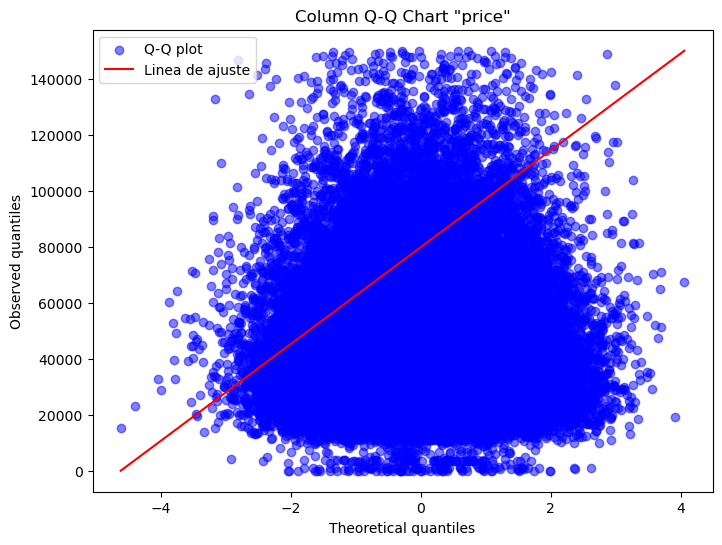

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_teoricos, price_sorted, color='blue', alpha=0.5, label='Q-Q plot')
plt.plot([np.min(quantiles_teoricos), np.max(quantiles_teoricos)], [np.min(price_sorted), np.max(price_sorted)], color='red', label='Linea de ajuste')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Observed quantiles')
plt.title('Column Q-Q Chart "price"')
plt.legend()
plt.show()

# Model Linear Regression

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [45]:
test_sizes = [0.2, 0.25, 0.3]
linear_scores = []

In [46]:
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=test_size, random_state=42)
    
    lm = LinearRegression()
    scores = cross_val_score(lm, X_train, y_train, cv=5, scoring="r2")
    
    linear_scores.append(scores)

In [47]:
for i, size in enumerate(test_sizes):
    print(f"R2 score for LR on {size}: {np.mean(linear_scores[i])}")

R2 score for LR on 0.2: 0.877532530096987
R2 score for LR on 0.25: 0.6676743926861246
R2 score for LR on 0.3: 0.6894598161216585


## Hyperparameters

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

### Hyperparameter tuning

### Linear Regretion

In [49]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'n_jobs': [50, 100, 150]}
    
lm = LinearRegression()

gs = GridSearchCV(lm, param_grid=param_grid, cv=5)

gs.fit(X_train_linear, y_train_linear)

lm_best_params = gs.best_params_
lm_best_score = gs.best_score_
best_estimator = gs.best_estimator_

print("Best params for LR: ", lm_best_params)
print("Best score: ", lm_best_score)

Best params for LR:  {'n_jobs': 50}
Best score:  0.6894622947049519


### Coefficients Calculation

In [50]:
print("Intercepto:", best_estimator.intercept_)
print("Coeficientes:", best_estimator.coef_)

Intercepto: -7648042.546624964
Coeficientes: [-9.47429501e+02  2.99000061e+03 -8.60995425e-12  3.88014281e+03
  2.23101492e+00  1.75199200e+01  6.38543435e+01 -2.87415121e+02
 -1.70512635e+02  1.31936348e+03 -2.56003266e+03  5.48181429e+00
 -5.55943664e+01 -7.37798203e+01 -9.30851761e+02 -3.23212533e+02
 -1.86623355e+03  3.50563049e+01 -1.20033974e+03  3.86736258e+02
 -2.62360871e+00  3.16831458e-01]


## Predictions

In [51]:
y_pred = best_estimator.predict(X_test_linear)

### RMSE and R^2

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
rmse = np.sqrt(mean_squared_error(y_test_linear, y_pred))
r2 = r2_score(y_test_linear, y_pred)

In [54]:
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 7823.334797815846
R^2: 0.8707696437267003


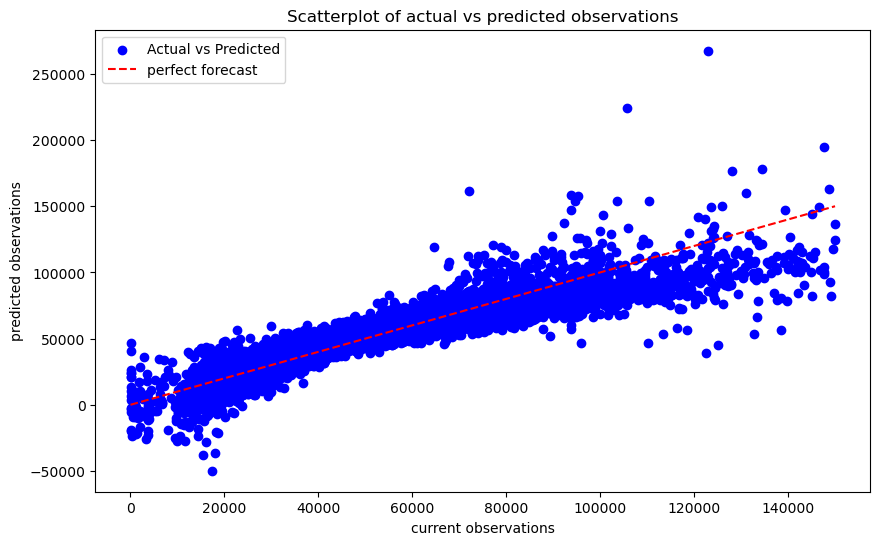

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='perfect forecast')

plt.title('Scatterplot of actual vs predicted observations')
plt.xlabel('current observations')
plt.ylabel('predicted observations')
plt.legend()
plt.show()

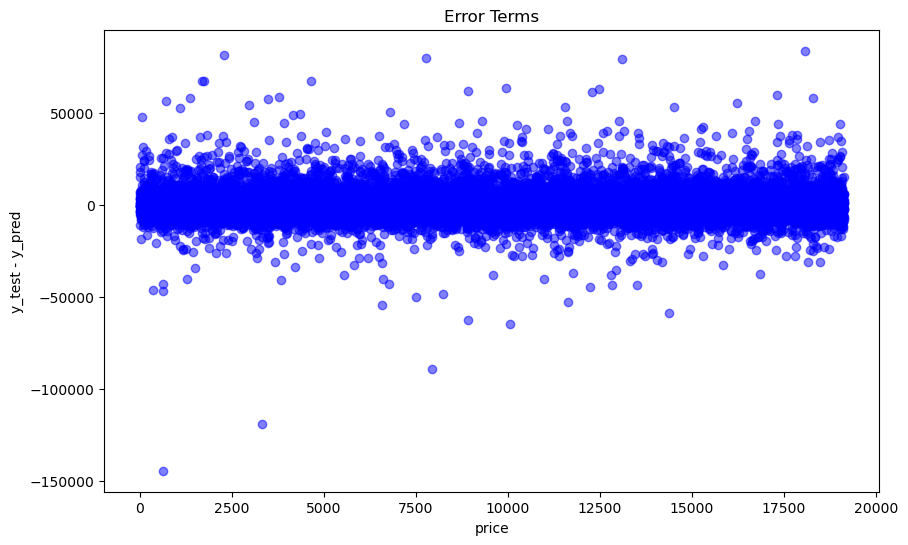

In [56]:
error_terms = y_test_linear - y_pred
plt.figure(figsize=(10, 6))

plt.scatter(range(len(error_terms)), error_terms, color='blue', alpha=0.5)
plt.title('Error Terms')
plt.xlabel('price')
plt.ylabel('y_test - y_pred')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [58]:
r_squared = r2_score(y_test, y_pred)

In [59]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 61204567.3587163
r_square_value : 0.8707696437267003


In [60]:
y_intercept = y_pred[0]

y_intercept

41861.006258158945

# Communicate Results

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
y = data['price']
X = data.drop('price', axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
error_terms = y_test - y_pred

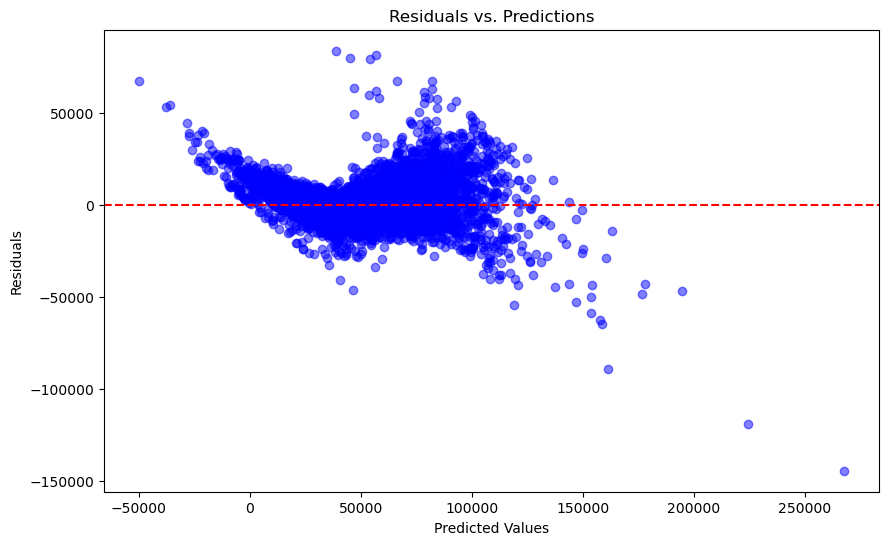

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, error_terms, color='blue', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


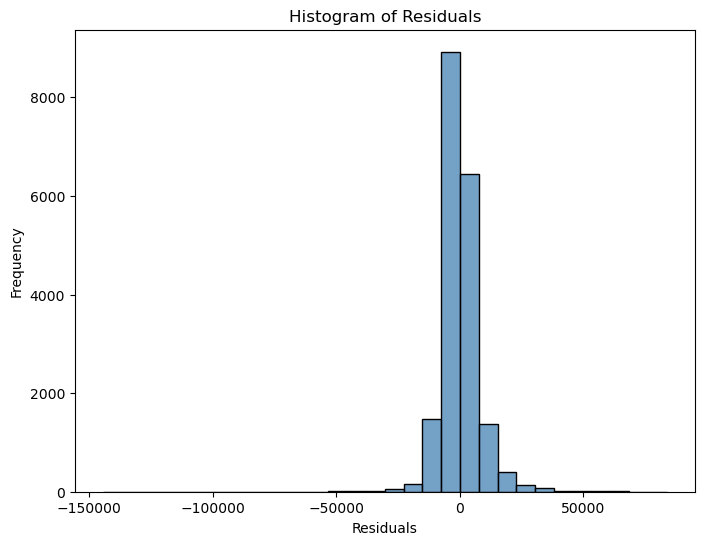

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(error_terms, color='steelblue', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [69]:
from scipy.stats import shapiro
shapiro_test_statistic, shapiro_p_value = shapiro(error_terms)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

Shapiro-Wilk Test:
Test Statistic: 0.8633496761322021
p-value: 0.0


C:\Users\monte\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Reject the null hypothesis. The residuals do not follow a normal distribution.

## Comparison of models

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [71]:
mse_lr = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_lr = r2_score(y_test, y_pred)
r2_rf = r2_score(y_test, rf_y_pred)

In [72]:
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression Metrics:
Mean Squared Error: 61204567.3587163
R^2 Score: 0.8707696437267003


In [73]:
print("\nRandom Forest Metrics:")
print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)


Random Forest Metrics:
Mean Squared Error: 3634563.67717446
R^2 Score: 0.9923258021554766


# Reference

https://github.com/derlyai/Machine-Learning--10-ETCS--.git

Housing price of Beijing from 2011 to 2017, fetching from https://www.kaggle.com/datasets/ruiqurm/lianjia

Beijing second-hand house Beijing rent Beijing real estate network Beijing Lianjia network. (2024). Recovered from: https://bj.lianjia.com/chengjiao

Clostermann, Zhong, Zhao, Li, Cheng, Ding. (2023). Capital Square Beijing Renovation. ARQA. Recovered from: https://arqa.com/en/architecture/capital-square-beijing-renovation.html [March 25,2024]

Zhicheng. (2020). Chinese growth of 6.1%, the lowest in 30 years. PIME Asianews. Recovered from: https://www.asianews.it/noticias-es/El-crecimiento-chino-del-6,1,-el-m%C3%A1s-bajo-en-30-a%C3%B1os-49052.html.

EURE (Santiago) vol.37 no.111 Santiago (mayo 2011). Recovered from: https://www.scielo.cl/scielo.php?pid=S0250-71612011000200010&script=sci_arttext&tlng=pt.

Alberca, A. S. (2020, October 4). La librería Matplotlib | Aprende con Alf. Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/matplotlib/

Smith, P. (2019). Living in Dublin, 3rd ed. Dublin: Longman.[image-4.png](attachment:image-4.png)

Shrewsbury, M. (2011). The similarities in humans and non human primates, Journal of Anatomy, vol. 202, no. 4, p.51-59.[image-5.png](attachment:image-5.png)

ML | Handling Imbalanced Data with SMOTE and near Miss Algorithm in Python. GeeksforGeeks, 28 June 2019, www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/. Accessed 12 Aug. 2022
[image.png](attachment:image.png)

Müller, Andreas C, and Sarah Guido. Introduction to Machine Learning with Python : A Guide for Data Scientists. Beijing, O’reilly, 2017[image-2.png](attachment:image-2.png).

Vaughan, Daniel. Analytical Skills for AI et Data Science : Building Skills for an AI-Driven Enterprise. Beijing ; Boston ; Farnham ; Sebastopol ; Tokyo O’reilly Media, 21 May 2020.[image-3.png](attachment:image-3.png)

Solving Linear Regression in Python.GeeksforGeeks,2020 July 16,https://www.geeksforgeeks.org/solving-linear-regression-in-python/ . Accessed 16 May. 2024.

Bobbitt, Z. (2022, May 11). A gentle guide to sum of squares: SST, SSR, SSE. Statology. https://www.statology.org/sst-ssr-sse/

Bobbitt, Z. (2020, February 27). How to calculate mean squared Error (MSE) in Excel. Statology. https://www.statology.org/how-to-calculate-mean-squared-error-mse-in-excel/

OpenAI. (2024). ChatGPT (May 16 version) [How to interpret measures of central tendency].
https://chat.openai.com/chat (https://chat.openai.com/chat)

Christoph Helma, Eva Gottmann, Stefan Kramer, Knowledge discovery and data mining in toxicology, Stat. Methods Med. Res. 9 (4) (2000) 329–358.

I.-N. Lee, S.-C. Liao, M. Embrechts, Data mining techniques applied to medical information, Med. Inf. Internet Med. 25 (2) (2000) 81–102.